In [1]:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from math import sqrt 


from scipy.stats import t, normaltest,  levene, ttest_ind, bartlett
from statannotations.Annotator import Annotator

In [2]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin = load_data("styptic")
origin

[data] https://data.hossam.kr/data/lab10_/styptic.xlsx
[desc] 실험 참가자를 두 그룹으로 임의 분할한 후 피부에 작은 상처를 내어 피가 흐르게 한 다음, 한 그룹에는 지혈제 B를 다른 그룹에는 지혈제 G를 투여하여 완전히 지혈될 때 까지의 시간(분)을 측정한 두 종료의 지혈제 효과를 측정한 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,B,G
0,8.80,9.9
1,8.90,10.0
2,8.40,9.0
3,7.90,11.1
4,8.20,9.8
5,8.70,9.6
6,7.90,10.3
7,9.10,8.7
8,9.60,10.4
9,8.75,9.5


In [4]:
data = origin[['B','G']]

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field":c ,
        "statistic":s,
        "p-value":p,
        "result":normalize

    }) 
    normal_dist = normal_dist and normalize

if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T)

    else:
        n = "Levene"
        s, p = levene(*data.values.T,  center = 'median')

    report.append({
        "field":n,
        "statistic":s,
        "p-value":p,
        "result":p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df


,statistic,p-value,result
field,,,
B,0.083269,0.959221,True
G,0.200950,0.904408,True
Bartlett,0.555515,0.456073,True


📝[4]두 그룹간 지현 시간 평균에 차이가 있는지 검정

In [5]:
s,p = ttest_ind(origin['B'], origin['G'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -4.350, p-value: 0.000, 대립가설 채택'

📝[5]B그룹의 평균이 G그룹 평균보다 더 큰지 검정

In [6]:
s, p = ttest_ind(origin['B'], origin['G'], alternative= 'greater')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설채택".format(s,p, "대립" if p<= 0.05 else "귀무") 

'statistic:-4.350, p-value:1.000, 귀무가설채택'

📝[6]B그룹의 평균이 G그룹 평균보다 더 작은지 검정

In [7]:
s, p = ttest_ind(origin['B'], origin['G'], alternative = 'less')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설채택".format(s,p,"대립"if p<=0.05 else "귀무")

'statistic:-4.350, p-value:0.000, 대립가설채택'

📝[6]가설검정 시각화

In [8]:
df = melt(origin, var_name='group', value_name = 'value')
df

,group,value
0,B,8.80
1,B,8.90
2,B,8.40
3,B,7.90
4,B,8.20
5,B,8.70
6,B,7.90
7,B,9.10
8,B,9.60
9,B,8.75


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B vs. G: t-test independent samples, P_val:3.862e-04 t=-4.350e+00


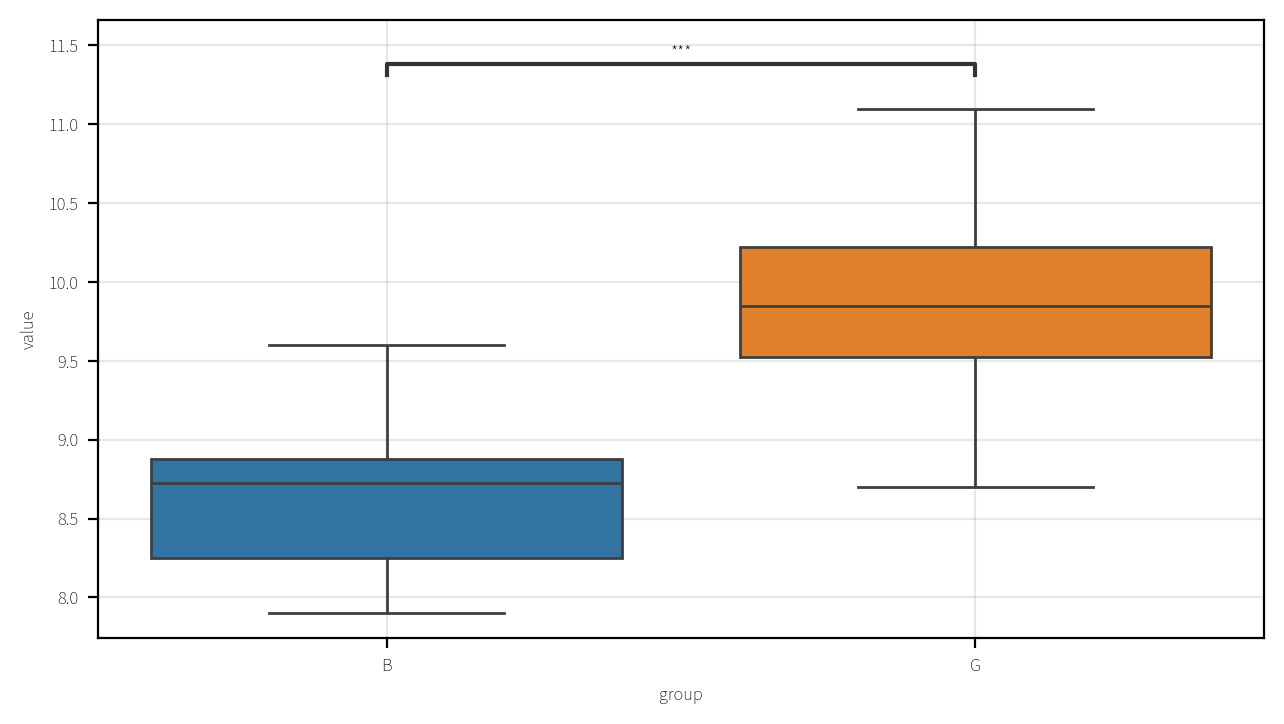

In [9]:
# 시각화
# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
# 2) BoxPlot 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')
annotator = Annotator(ax, data=df, x='group', y='value',
pairs=[('B', 'G')])
annotator.configure(test='t-test_ind')
annotator.apply_and_annotate()
# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시
# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

📘 #03. 예제(2) - 인공심장 효과 측정

In [10]:
origin = load_data("heatrate")
origin

[data] https://data.hossam.kr/data/lab10_/heatrate.xlsx
[desc] 두 독립적인 그룹의 심장병 환자에 대한 심장계수(cardiac index)를 측정한 데이터. `그룹1`은 심장수술을 받고 부착한 인공장기의 기능이 정상적인 사람들이고, `그룹2`는 비정상으로 판명된 사람들이다.심장계수는 수술 직후에 측정하였다. (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,그룹1,그룹2
0,3.84,3.97
1,2.60,2.50
2,1.19,2.70
3,2.00,3.36
4,6.20,3.55
5,0.96,2.97
6,5.50,3.20
7,3.18,2.30


,statistic,p-value,result
field,,,
그룹1,0.839625,0.657170,True
그룹2,0.260764,0.877760,True
Bartlett,8.029088,0.004603,False


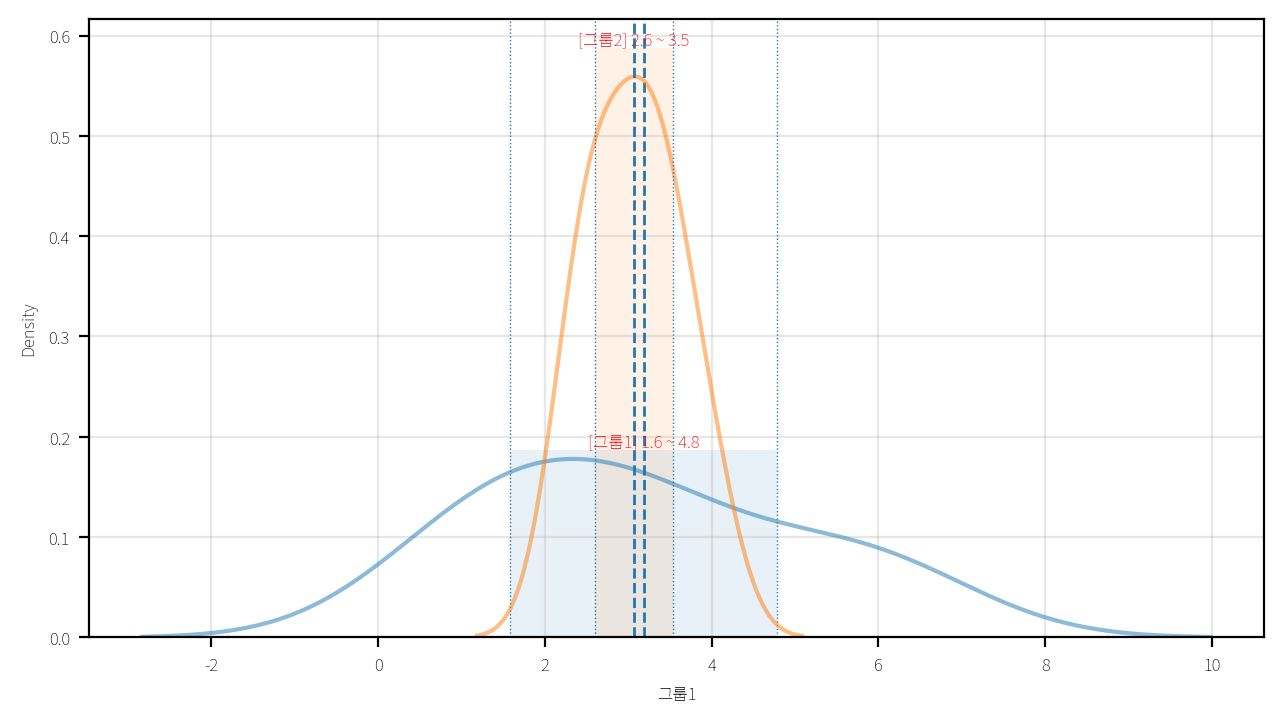

In [15]:
data = origin[['그룹1', '그룹2']] # 확인할 데이터
# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
for c in data.columns:
# KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)
# 신뢰구간
    max = data[c].max() # 최대값
    clevel = 0.95 # 신뢰수준
    dof = len(data[c]) - 1 # 자유도
    sp_mean = data[c].mean() # 표본평균
    sp_std = data[c].std(ddof=1) # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c])) # 표본표준오차
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean,
        scale=sp_std_error)
    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)
# 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
        y=ymax,
        s="[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
        horizontalalignment="center",
        verticalalignment="bottom",
        fontdict={"size": 6, "color": "red"})
# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시/숨김
# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

두 그룹의 커널 밀도 함수 그래프의 모양이 정규분포를 띄고 있으며, 두 그룹의 데이터 분포
가 서로 다르다고 할 수 있다.
또한 두 그룹 모두 표본평균이 신뢰구간에 포함되어 있으므로 데이터가 정상범위에 있다고
할 수 있다.

In [18]:
# 가설검정의 가정 확인

data = origin[['그룹1', '그룹2']] # 검사하려는 데이터 추출
equal_var_fields = []
normal_dist = True
report = []
for c in data.columns:
    s, p = normaltest(data[c])
    normalize = p > 0.05
    report.append({
    "field": c,
    "statistic": s,
    "p-value": p,
    "result": normalize
})
normal_dist = normal_dist and normalize
# 변수가 두 개 이상인 경우 등분산성 확인
if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
# 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*data.values.T) # 모든 컬럼의 데이터를 한번에 전달
else:
    n = "Levene" # 정규성을 충족하지 않을 경우의 검정방법
    s, p = levene(*data.values.T, center='median') # 모든 컬럼의 데이터를 한번에 전달
report.append({
    "field": n,
    "statistic": s,
    "p-value": p,
    "result": p > 0.05
})
report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
그룹1,0.839625,0.657170,True
그룹2,0.260764,0.877760,True
Bartlett,8.029088,0.004603,False


정규성은 만족하지만 등분산성을 만족하지는 않는다. 어떻게 하지?

📝 [4] 두 그룹간 심장계수의 차이가 있는지를 검정

In [21]:
s, p = ttest_ind(origin['그룹1'], origin['그룹2'], alternative='two-sided',
equal_var=False)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 0.163, p-value: 0.874, 귀무가설 채택'

p-value가 0.05보다 크므로(P > 0.05) 귀무가설을 기각할 수 없다. 즉, 두 그룹의 심장
계수가 다르다고 판단할 근거가 없다.

📝 [5] 그룹1의 심장계수가 그룹2의 심장계수보다 작은지 검정

In [24]:
s, t = ttest_ind(origin['그룹1'], origin['그룹2'], alternative='less',
equal_var=False)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 0.163, p-value: 0.874, 귀무가설 채택'

p-value가 0.05보다 크므로(P > 0.05) 귀무가설을 기각할 수 없다. 즉, 그룹1의 심장계
수는 그룹2의 심장계수보다 작지 않다.

📝 [6] 그룹1의 심장계수가 그룹2의 심장계수보다 큰지 검정

In [26]:
s, t = ttest_ind(origin['그룹1'], origin['그룹2'],
alternative='greater', equal_var=False)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 0.163, p-value: 0.874, 귀무가설 채택'

p-value가 0.05보다 크므로(P > 0.05) 귀무가설을 기각할 수 없다. 즉, 그룹1의 심장계
수가 그룹2의 심장계수보다 크지 않다.

📝 [7] 가설검정 시각화

In [27]:
df = melt(origin, var_name='group', value_name='value')
df

,group,value
0,그룹1,3.84
1,그룹1,2.60
2,그룹1,1.19
3,그룹1,2.00
4,그룹1,6.20
5,그룹1,0.96
6,그룹1,5.50
7,그룹1,3.18
8,그룹2,3.97
9,그룹2,2.50


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

그룹1 vs. 그룹2: Welch's t-test independent samples, P_val:8.742e-01 t=1.633e-01


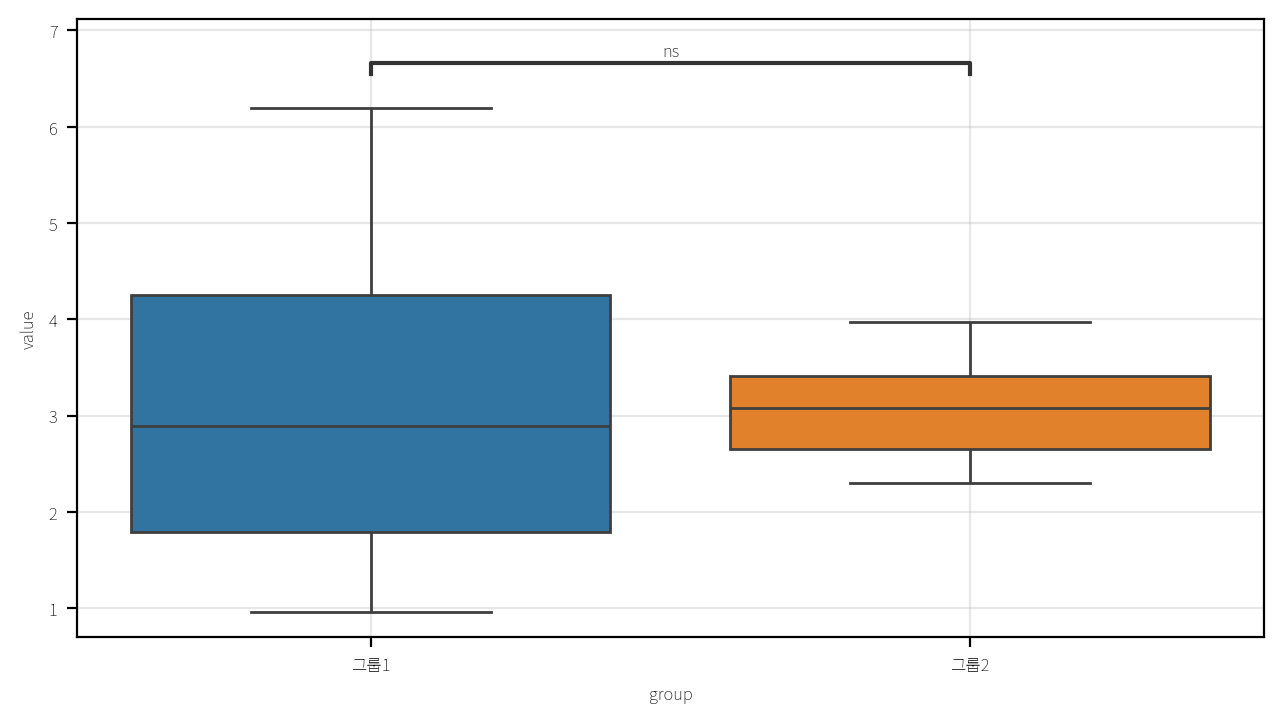

In [29]:
# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
# 2) BoxPlot 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')
annotator = Annotator(ax, data=df, x='group', y='value', pairs=[("그룹1", "그룹2")])
annotator.configure(test='t-test_welch')
annotator.apply_and_annotate()
# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시
# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료
